In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tqdm.auto import trange, tqdm

c:\Users\Cr0l3y\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
(X_treino, y_treino), (X_teste, y_teste) = tf.keras.datasets.fashion_mnist.load_data()
X_treino = (X_treino / 127.5) - 1.0
X_treino = np.expand_dims(X_treino, axis=-1)

In [3]:
IMG_SIZE = 28     
BATCH_SIZE = 128  
timesteps = 16    
time_bar = 1 - np.linspace(0, 1.0, timesteps + 1)

In [ ]:
def cvtImg(img):
    img = img - img.min()
    img = (img / img.max())
    return img.astype(np.float32)
def show_examples(x):
    num_images = x.shape[0]
    plt.figure(figsize=(10, 10))
    for i in range(min(25, num_images)): 
        plt.subplot(5, 5, i+1)
        img = cvtImg(x[i])
        plt.imshow(img.squeeze(), cmap='gray')  
        plt.axis('off')

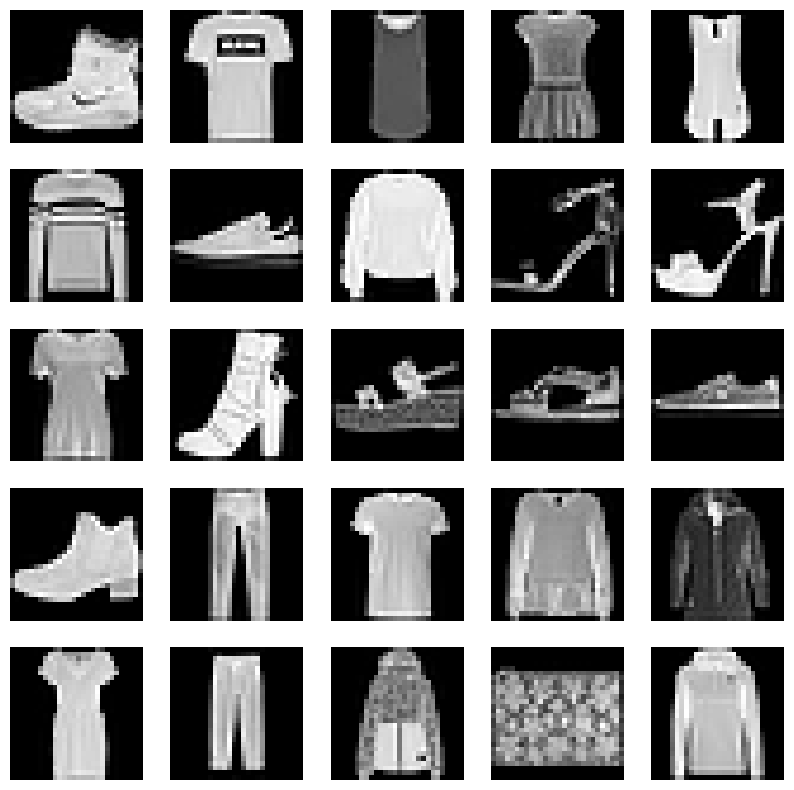

In [6]:
show_examples(X_treino)

In [ ]:
def forward_noise(x, t):
    a = time_bar[t]     
    b = time_bar[t + 1] 
    ruido = np.random.normal(size=x.shape) 
    a = a.reshape((-1, 1, 1, 1))
    b = b.reshape((-1, 1, 1, 1))
    img_a = x * (1 - a) + ruido * a
    img_b = x * (1 - b) + ruido * b
    return img_a, img_b
def generate_ts(num):
    return np.random.randint(0, timesteps, size=num)

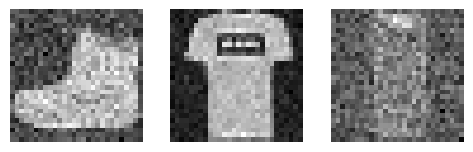

In [9]:
t = generate_ts(3)
a, b = forward_noise(X_treino[:3], t)
show_examples(a)

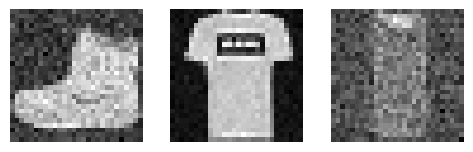

In [10]:
show_examples(b)